In [6]:
from bs4 import BeautifulSoup
import requests
import csv

In [7]:
u='https://www.airlinequality.com/airline-reviews/british-airways/page/'
airways=[]
for i in range(1,21):
    r=requests.get(u+str(i)+'/')
    w=r.content
    b=BeautifulSoup(w,'html.parser')
    n=b.findAll('div',{'class':'body'})
    for i in n:
        posted=i.find('time',{'itemprop':'datePublished'}).text
        name=i.findAll('span',{'itemprop':'name'})[0].text
        review=i.find('h2',{'class':'text_header'}).text
        details=i.findAll('div',{'class':'text_content'})[0].text
        air=[posted,name,review,details]
        airways.append(air)

In [9]:
import pandas as pd

In [15]:
df=pd.DataFrame(airways)
df.columns=['Date','Name','Review','Detailed Review']

In [16]:
df.to_csv('air.csv')

In [19]:
da=pd.read_csv('C:/Users/OBBU YASWANTH/air.csv')

In [20]:
da.head()

,Date,Name,Review,Detailed Review
0,7th February 2023,Keat Tan,"""Overall, very happy with BA""",✅ Trip Verified | BA 242 on the 6/2/23. Boardi...
1,6th February 2023,Adam Churchill,"""the best airline I've flown with""",✅ Trip Verified | Not only my first flight in...
2,4th February 2023,Maria del Carmen Riesco Martin,"""so determined to help""",✅ Trip Verified | My husband and myself were ...
3,31st January 2023,S Anderson,"""crew are a credit to BA""",✅ Trip Verified | Organised boarding process. ...
4,31st January 2023,M Wilson,"""catalogue of errors and inconveniences""",✅ Trip Verified | Outward journey BA245 Londo...


In [22]:
da.shape

(200, 4)

In [24]:
r = ['✅ Trip Verified |', 'Not Verified |',]

for i in range(len(da['Detailed Review'])):
    for j in r:
        if j in da['Detailed Review'][i]:
            da['Detailed Review'] = da['Detailed Review'].str.replace(j,'')

C:\Users\OBBUYA~1\AppData\Local\Temp/ipykernel_5900/4098380226.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  da['Detailed Review'] = da['Detailed Review'].str.replace(j,'')


In [25]:
da.head()

,Date,Name,Review,Detailed Review
0,7th February 2023,Keat Tan,"""Overall, very happy with BA""",| BA 242 on the 6/2/23. Boarding was delayed d...
1,6th February 2023,Adam Churchill,"""the best airline I've flown with""","| Not only my first flight in 17 years, but a..."
2,4th February 2023,Maria del Carmen Riesco Martin,"""so determined to help""",| My husband and myself were flying to Madrid...
3,31st January 2023,S Anderson,"""crew are a credit to BA""",| Organised boarding process. Really friendly ...
4,31st January 2023,M Wilson,"""catalogue of errors and inconveniences""",| Outward journey BA245 London to Buenos Aire...


In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\OBBU
[nltk_data]     YASWANTH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

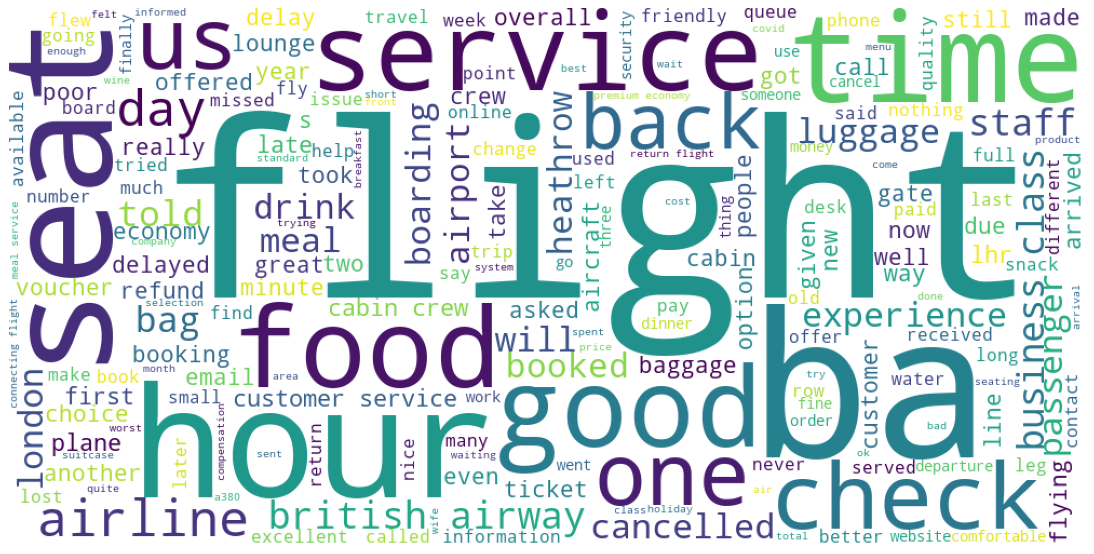

In [44]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comment_words = ''
stopwords = set(STOPWORDS)
for val in da['Detailed Review']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)       
plt.figure(figsize = (15,9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()